### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/Recipes5k/'
FILE = 'embeddings_blip2.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['image'], inplace=True)
df.head()

,class,split,ingredients,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,...,embedding_758,embedding_759,embedding_760,embedding_761,embedding_762,embedding_763,embedding_764,embedding_765,embedding_766,embedding_767
0,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal...",0.268148,0.118482,0.527285,0.679575,0.768967,0.689292,-0.224705,...,0.090966,-0.398971,0.688301,0.043088,0.224984,-0.710755,-0.122232,-1.314176,-0.005709,0.145740
1,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio...",0.694369,0.132131,0.552054,0.690234,0.751604,0.763981,-0.124808,...,0.136498,-0.317557,0.709794,-0.062003,0.398320,-0.599754,-0.019592,-1.293210,-0.088878,-0.034316
2,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l...",0.987765,0.106985,0.627511,0.791428,0.731984,0.908869,-0.277453,...,0.082077,-0.339882,0.739969,-0.035744,0.431351,-0.580834,-0.127199,-1.479895,-0.026995,-0.096399
3,onion_rings,train,"oil,pancake mix,spanish onion",0.758376,0.082775,0.606341,0.847369,0.683725,0.950904,-0.301977,...,-0.094187,-0.320077,0.694592,0.025771,0.467629,-0.659626,-0.204033,-1.438963,0.046004,-0.045891
4,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,...",0.673833,0.077512,0.550906,0.807606,0.741684,0.933634,-0.315506,...,0.053576,-0.264750,0.704462,0.086500,0.410355,-0.567043,-0.122300,-1.432195,-0.045221,-0.005441


## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors. 
# In this case, since we just have multimodal embeddings instead of unimodal embeddings,
# We'll split the column into half and half so we can use the same code.
# Identify columns with "embedding_" in their names
embedding_columns = [column for column in df.columns if 'embedding_' in column]

# Split the embedding columns evenly between text and image columns
num_embeddings = len(embedding_columns)
half_num_embeddings = num_embeddings // 2

text_columns = embedding_columns[:half_num_embeddings]
image_columns = embedding_columns[half_num_embeddings:]

label_columns = 'class'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (3409, 771)
Test Shape: (783, 771)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.43 MB
The number of parameters of the model are: 111717


STAGE:2024-02-07 19:27:39 25297:25297 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.0204
Epoch 1/15 - Training Time: 0.33 seconds | Inference Time: 0.11 seconds
Epoch 2/15 - Test Accuracy: 0.0192
Epoch 2/15 - Training Time: 0.34 seconds | Inference Time: 0.11 seconds
Epoch 3/15 - Test Accuracy: 0.0217
Epoch 3/15 - Training Time: 0.38 seconds | Inference Time: 0.13 seconds
Epoch 4/15 - Test Accuracy: 0.0217
Epoch 4/15 - Training Time: 0.35 seconds | Inference Time: 0.11 seconds
Epoch 5/15 - Test Accuracy: 0.0268
Epoch 5/15 - Training Time: 0.40 seconds | Inference Time: 0.11 seconds
Epoch 6/15 - Test Accuracy: 0.0268
Epoch 6/15 - Training Time: 0.35 seconds | Inference Time: 0.12 seconds
Epoch 7/15 - Test Accuracy: 0.0268
Epoch 7/15 - Training Time: 0.37 seconds | Inference Time: 0.12 seconds
Epoch 8/15 - Test Accuracy: 0.0345
Epoch 8/15 - Training Time: 0.41 seconds | Inference Time: 0.12 seconds
Epoch 9/15 - Test Accuracy: 0.0217
Epoch 9/15 - Training Time: 0.35 seconds | Inference Time: 0.12 seconds
Epoch 10/15 - Test Accuracy: 0.0294
E

STAGE:2024-02-07 19:27:47 25297:25297 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 19:27:47 25297:25297 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         7.76%     497.298ms        56.22%        3.603s       4.448ms    -168.07 Mb    -196.46 Mb           810  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        37.65%        2.413s        38.13%        2.444s       2.361ms     208.06 Mb     207.67 Mb          1035  
                              Optimizer.step#AdamW.step         5.37%     343.998ms        16.79%        1.076s       1.328ms     872.81 Kb    -683.87

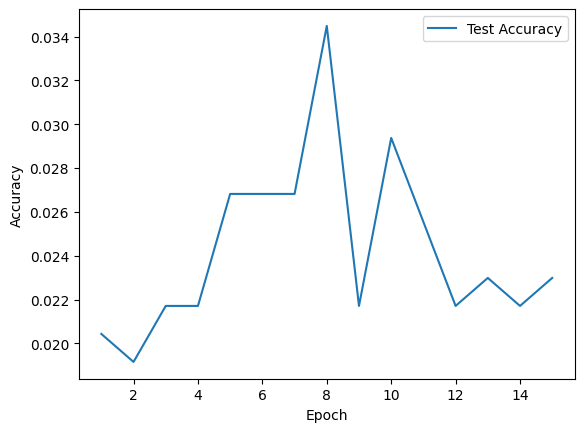

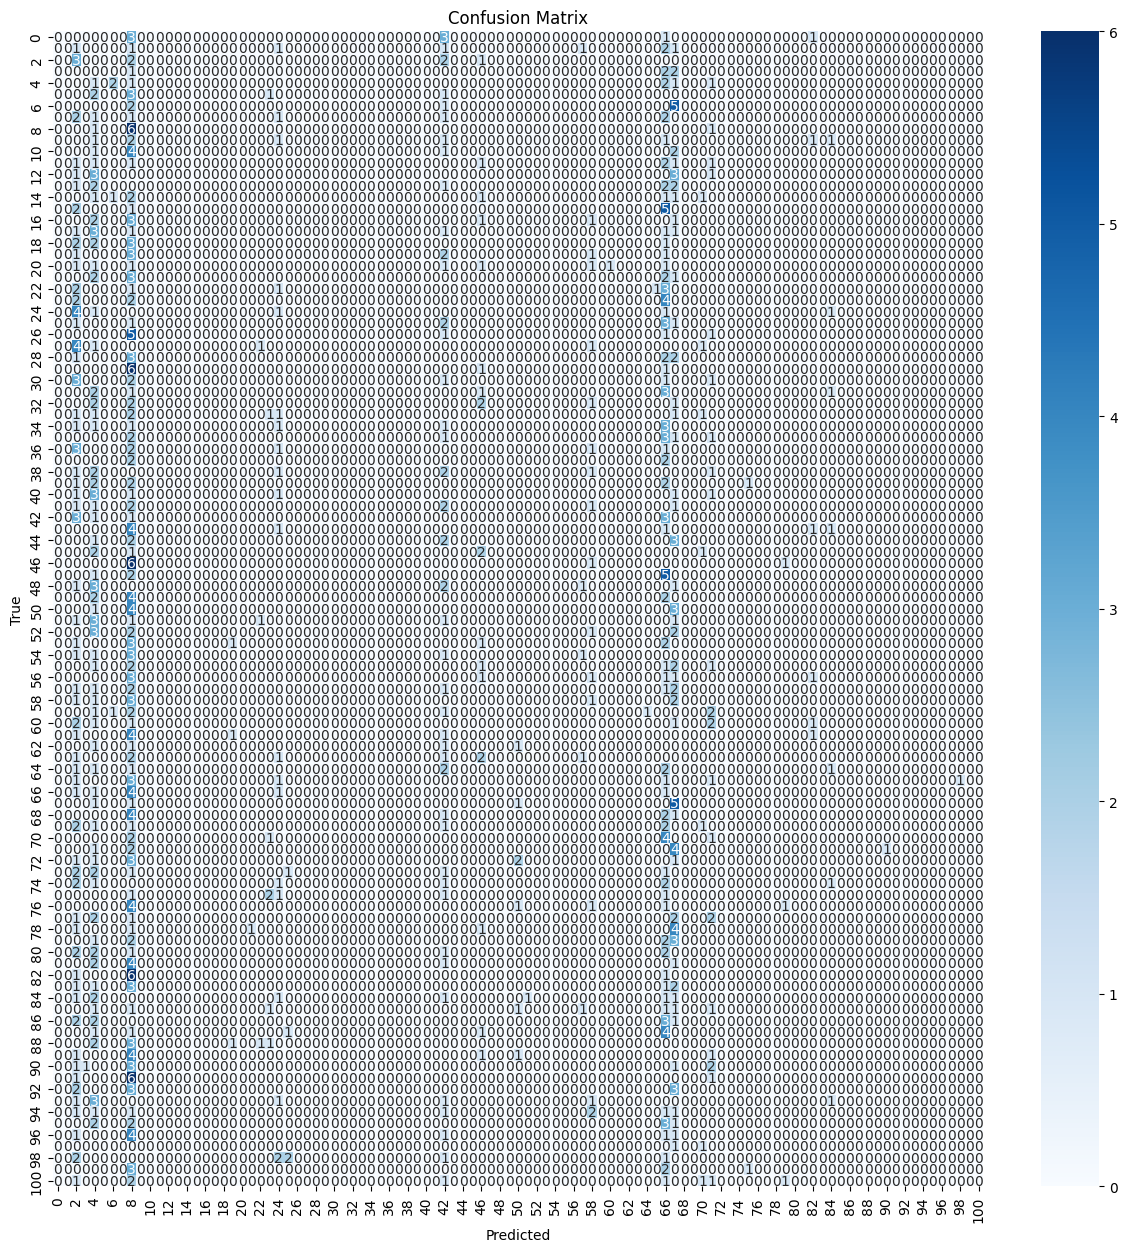

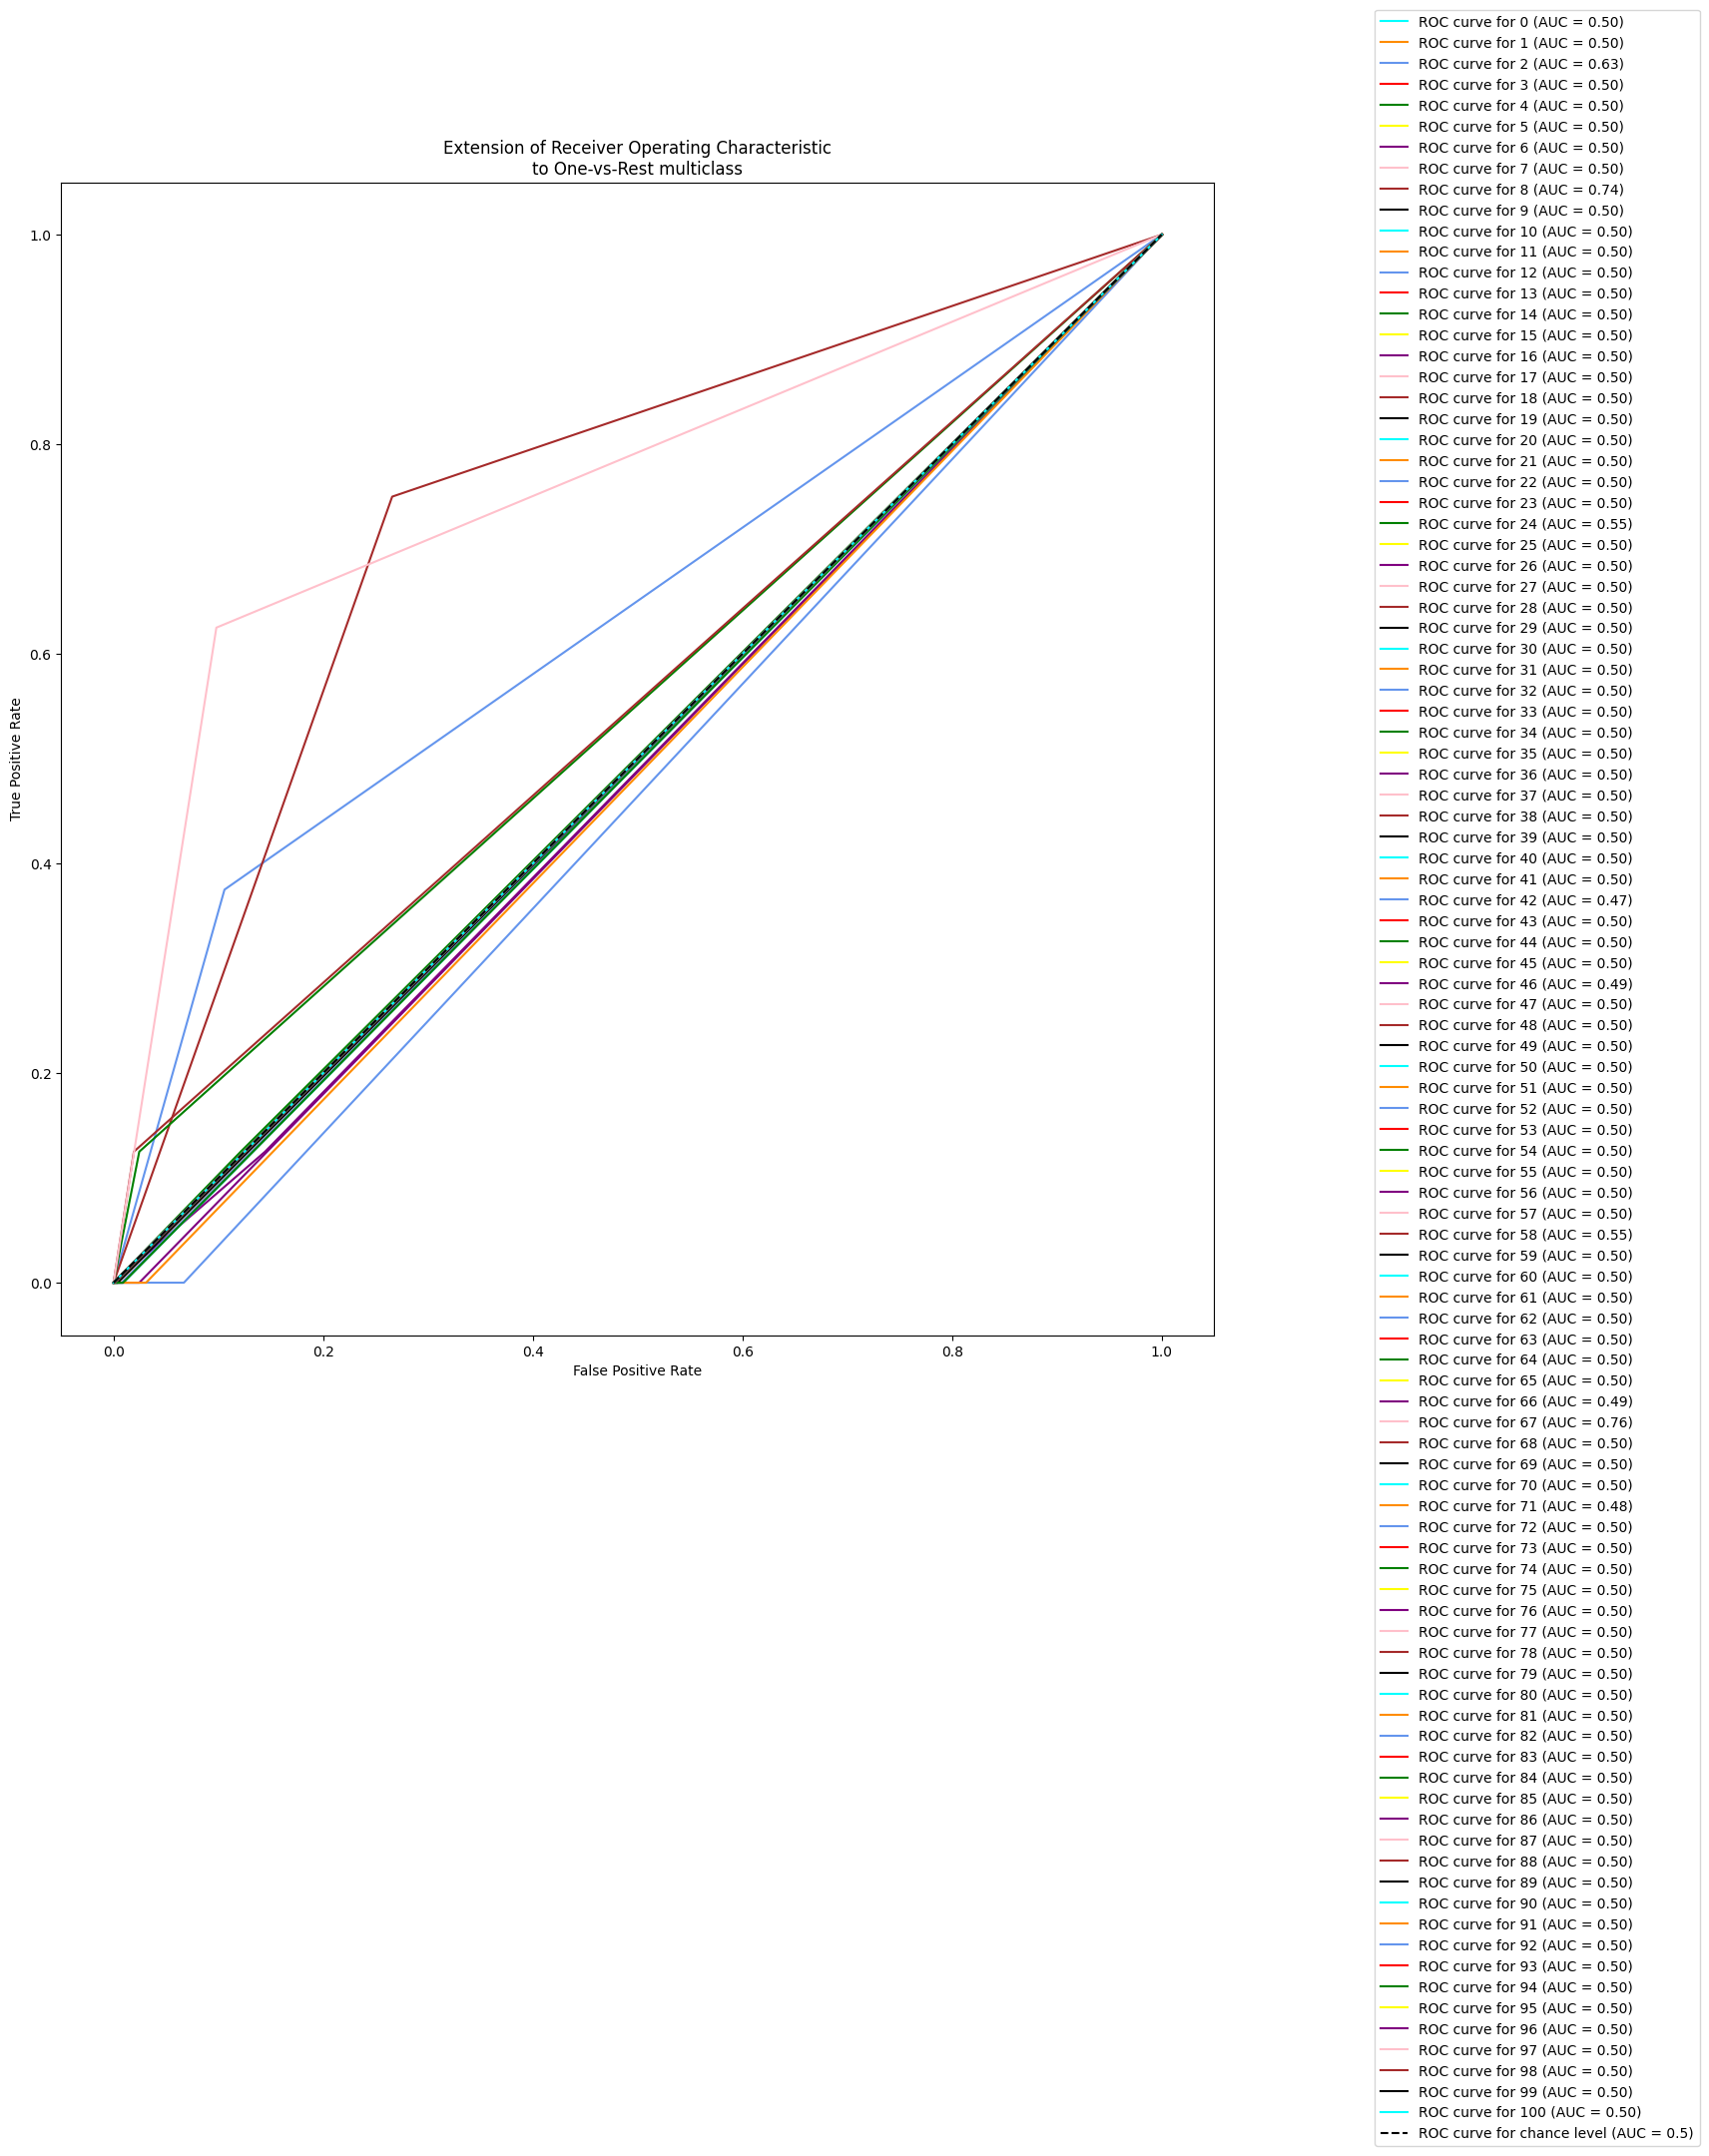

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.04      0.38      0.06         8
           3       0.00      0.00      0.00         5
           4       0.01      0.12      0.02         8
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.03      0.75      0.05         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         8
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00         8
          17       0.00    

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)